# Librarires

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, GaussianDropout, GlobalAveragePooling2D, MaxPooling2D,DepthwiseConv2D
from keras.models import Sequential, load_model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
from PIL import Image
import os
import shutil
import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import keras
from keras.optimizers import Adam
import os
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import pickle

# Assuming 'history' is your model's training history
from tensorflow.keras.models import load_model, save_model

In [6]:


def rotate(folder_path,dest_folder,angle=90):
    files = os.listdir(folder_path)
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            image_path = os.path.join(folder_path, file_name)
            img = Image.open(image_path)
            rotated_img = img.rotate(90, expand=True)
            image_path=dest_folder+f"/rotated_{angle}_{file_name}"
            new_image_path = os.path.join(dest_folder, f"rotated_{angle}_{file_name}")

            # Ensure the destination folder exists, create if not
            os.makedirs(os.path.dirname(new_image_path), exist_ok=True)

            rotated_img.save(new_image_path)
            rotated_img.close()



def copy_images(source_folder, destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    image_files = glob.glob(os.path.join(source_folder, '*.jpg'))  # Change the extension if needed

    for image_file in image_files:
        file_name = os.path.basename(image_file)
        destination_path = os.path.join(destination_folder, file_name)
        shutil.copy(image_file, destination_path)

    print("Images copied successfully from", source_folder, "to", destination_folder)

def flip_images(folder_path, dest_folder):
    # List all files in the folder
    files = os.listdir(folder_path)

    # Process each file
    for file_name in files:
        # Check if the file is an image (you might want to refine this check)
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            # Open the image
            image_path = os.path.join(folder_path, file_name)
            img = Image.open(image_path)

            # Flip the image horizontally and save
            flipped_horizontal = img.transpose(Image.FLIP_LEFT_RIGHT)
            horizontal_image_path = os.path.join(dest_folder, f"flipped_horizontal_{file_name}")
            flipped_horizontal.save(horizontal_image_path)
            flipped_horizontal.close()

            # Flip the image vertically and save
            # flipped_vertical = img.transpose(Image.FLIP_TOP_BOTTOM)
            # vertical_image_path = os.path.join(dest_folder, f"flipped_vertical_{file_name}")
            # flipped_vertical.save(vertical_image_path)
            # flipped_vertical.close()

            # Close the original image
            img.close()

This code defines a convolutional neural network (CNN) using Keras' Sequential model for image classification, particularly designed for image data of size 150x150 with 3 color channels (RGB).

Here's a breakdown of the architecture:

1. **Convolutional Layers**:
    - There are multiple convolutional layers added conditionally based on the value of `layer_number`.
    - Each convolutional layer (`Conv2D`) applies a 2D convolution over the input data using a specified number of filters, a kernel size of 3x3, and `'same'` padding to preserve spatial dimensions.
    - Each convolutional layer is followed by:
        - Max pooling (`MaxPooling2D`) with a pool size of 2x2 to reduce spatial dimensions.
        - Batch normalization (`BatchNormalization`) to normalize and stabilize the learning process.
        - Rectified Linear Unit (ReLU) activation function (`Activation('relu')`) to introduce non-linearity.
        - Dropout (`Dropout(0.2)`) to randomly deactivate a fraction of neurons to prevent overfitting. The dropout rate here is set at 20%.

2. **Flatten Layer**:
    - After the convolutional layers, a flatten operation (`Flatten()`) is applied to transform the 2D output into a 1D array.

3. **Dense Layers**:
    - The flattened output is fed into a fully connected neural network with densely connected layers (`Dense()`).
    - Two hidden layers (`Dense(512, activation='relu')` and `Dense(256, activation='relu')`) are employed with ReLU activation.
    - Batch normalization is used after each dense layer to further stabilize and accelerate training.

4. **Output Layer**:
    - The final layer (`Dense(1, activation='sigmoid')`) consists of a single neuron with a sigmoid activation function, suitable for binary classification tasks, providing the probability of the input image belonging to a particular class.

The conditional statements (`if layer_number >= x`) control the addition of convolutional layers based on the value of `layer_number`, allowing flexibility in adjusting the depth of the network.

This model architecture comprises alternating convolutional and pooling layers for feature extraction, followed by fully connected layers for classification. The use of batch normalization and dropout aids in regularization and improving the model's generalization capabilities. Adjusting `layer_number` allows experimenting with different depths of the network.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

def create_model(layer_number=6):
    model = Sequential()
    if layer_number >= 1:
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', input_shape=(150, 150, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization(axis=-1))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dropout(0.2))
    if layer_number >= 2:
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization(axis=-1))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dropout(0.2))
    if layer_number >= 3:
        model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization(axis=-1))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dropout(0.2))
    if layer_number >= 4:
        model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization(axis=-1))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dropout(0.2))
    if layer_number >= 5:
        model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization(axis=-1))
        model.add(tf.keras.layers.Activation('relu'))
        model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    return model


In [8]:
def creat_train_model(train_ds,val_ds,layer_number=6,epochs=5):
  batch_size=32
  epoch=50
  model_6l=create_model(layer_number)
  model_6l.summary()
  optimizer = keras.optimizers.Adam(learning_rate=0.001)
  model_6l.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  history_6l = model_6l.fit(
    train_ds,
    batch_size=32,
    epochs=epochs,  # Specify the number of epochs
    validation_data = val_ds,
  )
  return history_6l, model_6l


In [9]:
def creat_datasets(train_data_dir,test_dir):
  train_ds = tf.keras.utils.image_dataset_from_directory(
  directory =train_data_dir,
  image_size = (150, 150),
  validation_split = 0.15,
  subset = "training",
  seed = 42,
  shuffle = True)

  val_ds = tf.keras.utils.image_dataset_from_directory(
  directory =train_data_dir,
  image_size = (150, 150),
  validation_split = 0.15,
  subset = "validation",
  seed = 42,
  shuffle = True)

  test_ds = tf.keras.utils.image_dataset_from_directory(
  directory =test_dir,
  image_size = (150, 150),
  seed = 42,
  shuffle = False)
  return train_ds,val_ds,test_ds

In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Extracting data from history
    loss = history.history['loss']
    val_loss = history.history['val_loss'] if 'val_loss' in history.history else None
    accuracy = history.history['accuracy'] if 'accuracy' in history.history else history.history['acc']
    val_accuracy = history.history['val_accuracy'] if 'val_accuracy' in history.history else history.history['val_acc']

    epochs = range(1, len(loss) + 1)

    # Plotting training and validation loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    if val_loss is not None:
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r', label='Training accuracy')
    if val_accuracy is not None:
        plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [11]:
def evaluate_model(train_ds,test_ds,model):
  test_loss,test_acc=model.evaluate(test_ds)
  train_loss,train_acc=model.evaluate(train_ds)
  # Plotting the confusion matrix using Seaborn
  train_predictions=model.predict(train_ds)
  test_predictions=model.predict(test_ds)
  train_predictions = [np.rint(i)[0] for i in train_predictions]
  test_predictions = [np.rint(i)[0] for i in test_predictions]

  train_true_labels = []
  # Iterate through the dataset to collect unique labels
  for images, labels in train_ds:
      train_true_labels.extend(labels.numpy())

  test_true_labels = []
  # Iterate through the dataset to collect unique labels
  for images, labels in test_ds:
      test_true_labels.extend(labels.numpy())

  train_cm = confusion_matrix(train_true_labels, train_predictions)
  test_cm = confusion_matrix(test_true_labels, test_predictions)
  print(train_cm)
  # Print classification report showing precision, recall, F1-score, and support
  print("\nClassification Report for train:")
  print(classification_report(train_true_labels, train_predictions))
  train_specificity= train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])
  print("Train's Specificity:", train_specificity)

  print("\nClassification Report for test:")
  print(classification_report(test_true_labels, test_predictions))
  test_specificity= test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])
  print("Test's Specificity:", test_specificity)

  # Plotting the confusion matrices using Seaborn
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g',
              xticklabels=['Negative', 'Positive'],
              yticklabels=['Negative', 'Positive'], ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')
  axes[0].set_xlabel('Predicted')
  axes[0].set_ylabel('Actual')

  sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g',
              xticklabels=['Negative', 'Positive'],
              yticklabels=['Negative', 'Positive'], ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  axes[1].set_xlabel('Predicted')
  axes[1].set_ylabel('Actual')

  plt.tight_layout()
  plt.show()
  return test_acc,test_loss,train_acc,train_loss

In [12]:
test_dir="/content/dataset/Dataset/xray_dataset_covid19/test"
train_data_dir="/content/dataset1/train"

In [ ]:
test_accs_augmented=[]

# First augmentation

## Deleting the dataset

In [ ]:
!rm -rf "/content/dataset1"

## Data Augment

In [13]:
source_folder_normal = "/content/dataset/Dataset/xray_dataset_covid19/train/NORMAL"
source_folder_covid = "/content/dataset/Dataset/xray_dataset_covid19/train/COVID"
destination_folder = "/content/dataset1/train"
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 90)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 90)

#Orignial data
copy_images(source_folder_normal, os.path.join(destination_folder, "NORMAL"))
copy_images(source_folder_covid, os.path.join(destination_folder, "COVID"))

Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/NORMAL to /content/dataset1/train/NORMAL
Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/COVID to /content/dataset1/train/COVID


## Dataloader

In [14]:
train_ds,val_ds,test_ds=creat_datasets(train_data_dir,test_dir)

Found 169 files belonging to 2 classes.
Using 144 files for training.
Found 169 files belonging to 2 classes.
Using 25 files for validation.
Found 40 files belonging to 2 classes.


## train

In [15]:
history_augment1,model_augment1=creat_train_model(train_ds,val_ds,layer_number=6,epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 75, 75, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 75, 75, 64)        0         
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       7

In [ ]:

model_augment1.save('/content/drive/MyDrive/model_augment1.h5')  # Save the model to a file
with open('/content/drive/MyDrive/training_history_augment1.pkl', 'wb') as file:
    pickle.dump(history_augment1.history, file)  # Save the history object to a file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

In [19]:
test_accs_augmented=[]

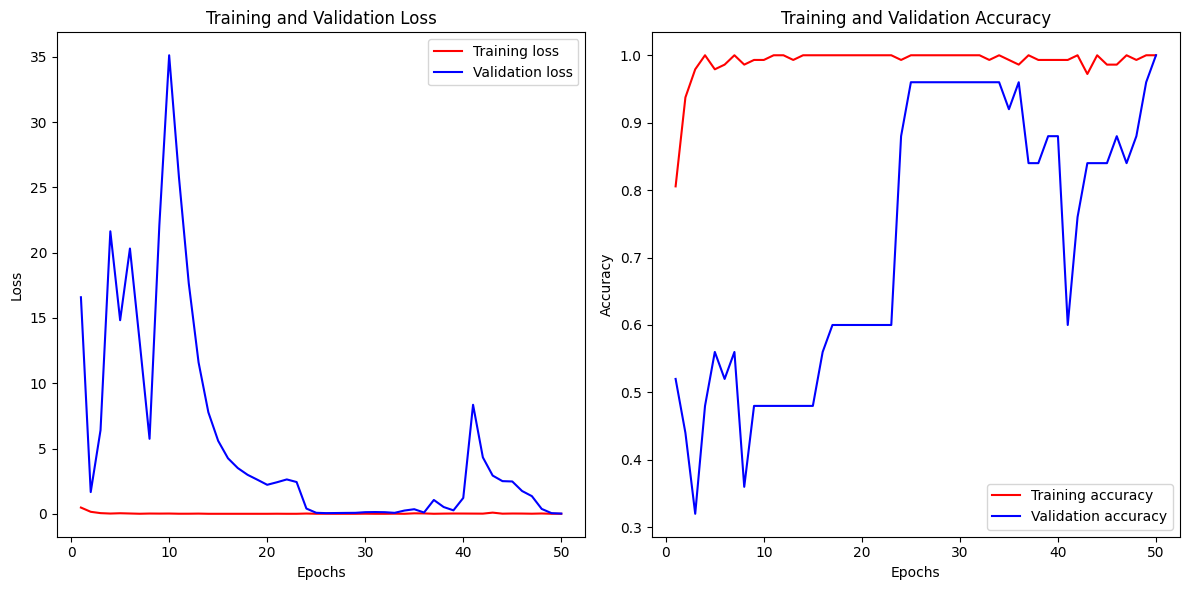

In [16]:
plot_history(history_augment1)

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = False)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = False)
test_ds = tf.keras.utils.image_dataset_from_directory(
directory =test_dir,
image_size = (150, 150),
seed = 42,
shuffle = False)


Found 169 files belonging to 2 classes.
Using 144 files for training.
Found 169 files belonging to 2 classes.
Using 25 files for validation.
Found 40 files belonging to 2 classes.


2/2 [==============================] - 0s 56ms/step
[[95  0]
 [ 0 49]]

Classification Report for train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        49

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Train's Specificity: 1.0

Classification Report for test:
              precision    recall  f1-score   support

           0       0.47      0.90      0.62        20
           1       0.00      0.00      0.00        20

    accuracy                           0.45        40
   macro avg       0.24      0.45      0.31        40
weighted avg       0.24      0.45      0.31        40

Test's Specificity: 0.9


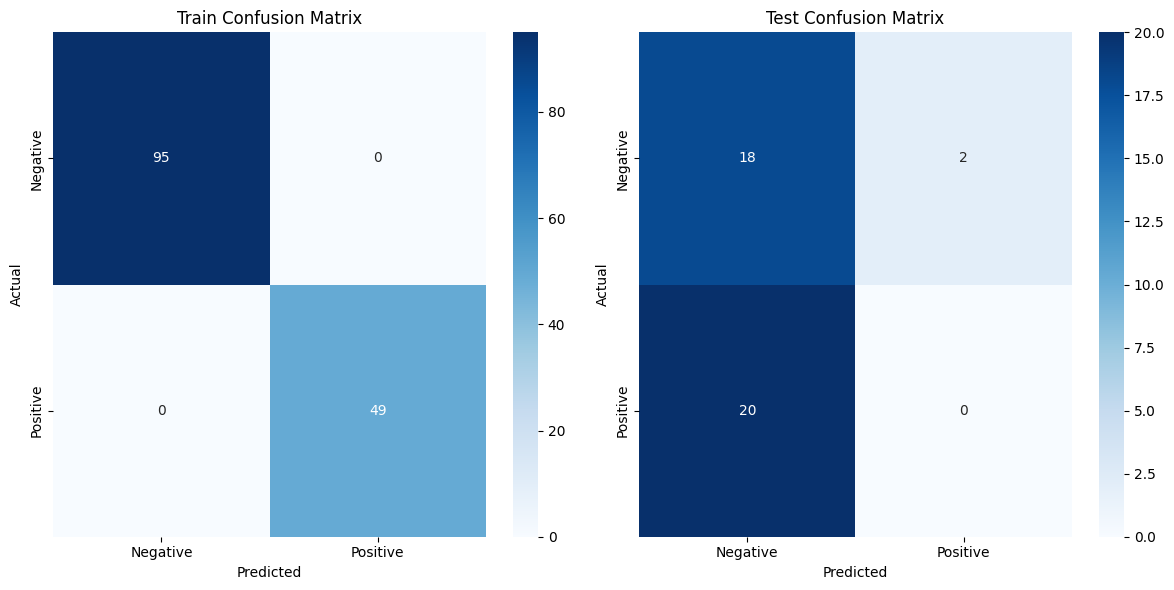

NameError: ignored

In [18]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model_augment1)
test_accs_augmented.append(test_acc)

In [20]:
test_accs_augmented.append(test_acc)

# Second augmentation

In [21]:
!rm -rf "/content/dataset1"


In [22]:
source_folder_normal = "/content/dataset/Dataset/xray_dataset_covid19/train/NORMAL"
source_folder_covid = "/content/dataset/Dataset/xray_dataset_covid19/train/COVID"
destination_folder = "/content/dataset1/train"
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 90)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 90)
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 180)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 180)
#Orignial data
copy_images(source_folder_normal, os.path.join(destination_folder, "NORMAL"))
copy_images(source_folder_covid, os.path.join(destination_folder, "COVID"))

Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/NORMAL to /content/dataset1/train/NORMAL
Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/COVID to /content/dataset1/train/COVID


## Dataloader

In [23]:
train_ds,val_ds,test_ds=creat_datasets(train_data_dir,test_dir)

Found 317 files belonging to 2 classes.
Using 270 files for training.
Found 317 files belonging to 2 classes.
Using 47 files for validation.
Found 40 files belonging to 2 classes.


## train

In [24]:
history_augment2,model_augment2=creat_train_model(train_ds,val_ds,layer_number=6,epochs=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 75, 75, 64)        256       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 75, 75, 64)        0         
                                                                 
 dropout_5 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 128)      

## Evaluation

In [ ]:

model_augment1.save('/content/drive/MyDrive/model_augment2.h5')  # Save the model to a file
with open('/content/drive/MyDrive/training_history_augment2.pkl', 'wb') as file:
    pickle.dump(history_augment2.history, file)  # Save the history object to a file

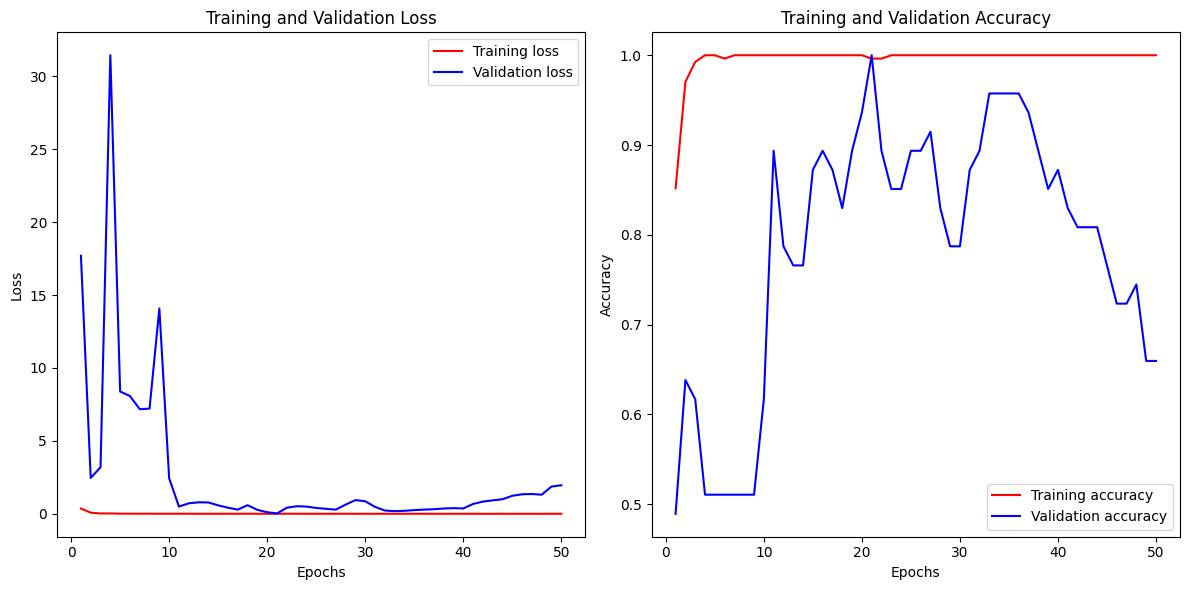

In [25]:
plot_history(history_augment2)

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = False)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = False)
test_ds = tf.keras.utils.image_dataset_from_directory(
directory =test_dir,
image_size = (150, 150),
seed = 42,
shuffle = False)


Found 317 files belonging to 2 classes.
Using 270 files for training.
Found 317 files belonging to 2 classes.
Using 47 files for validation.
Found 40 files belonging to 2 classes.


2/2 [==============================] - 0s 63ms/step
[[169   0]
 [ 58  43]]

Classification Report for train:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       169
           1       1.00      0.43      0.60       101

    accuracy                           0.79       270
   macro avg       0.87      0.71      0.73       270
weighted avg       0.84      0.79      0.76       270

Train's Specificity: 1.0

Classification Report for test:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40

Test's Specificity: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


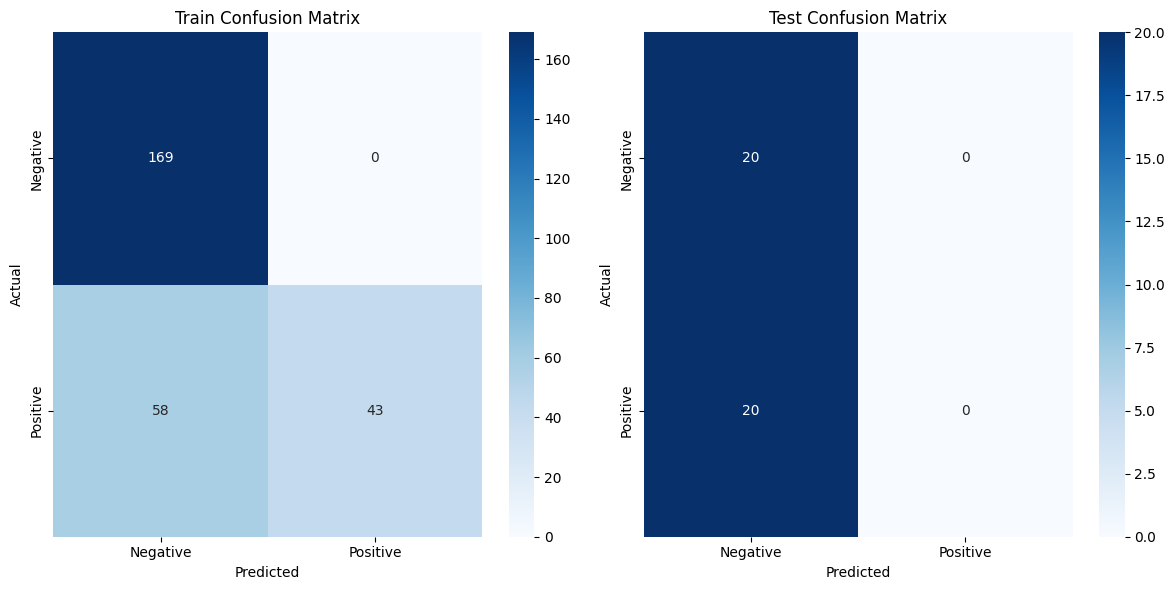

In [27]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model_augment2)
test_accs_augmented.append(test_acc)

# Third augmentation

In [28]:
!rm -rf "/content/dataset1"


In [29]:
source_folder_normal = "/content/dataset/Dataset/xray_dataset_covid19/train/NORMAL"
source_folder_covid = "/content/dataset/Dataset/xray_dataset_covid19/train/COVID"
destination_folder = "/content/dataset1/train"
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 90)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 90)
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 180)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 180)
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 270)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 270)
#Orignial data
copy_images(source_folder_normal, os.path.join(destination_folder, "NORMAL"))
copy_images(source_folder_covid, os.path.join(destination_folder, "COVID"))

Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/NORMAL to /content/dataset1/train/NORMAL
Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/COVID to /content/dataset1/train/COVID


## Dataloader

In [30]:
train_ds,val_ds,test_ds=creat_datasets(train_data_dir,test_dir)

Found 465 files belonging to 2 classes.
Using 396 files for training.
Found 465 files belonging to 2 classes.
Using 69 files for validation.
Found 40 files belonging to 2 classes.


## train

In [31]:
history_augment3,model_augment3=creat_train_model(train_ds,val_ds,layer_number=6,epochs=50)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_14 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_10 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 128)      

## Evaluation

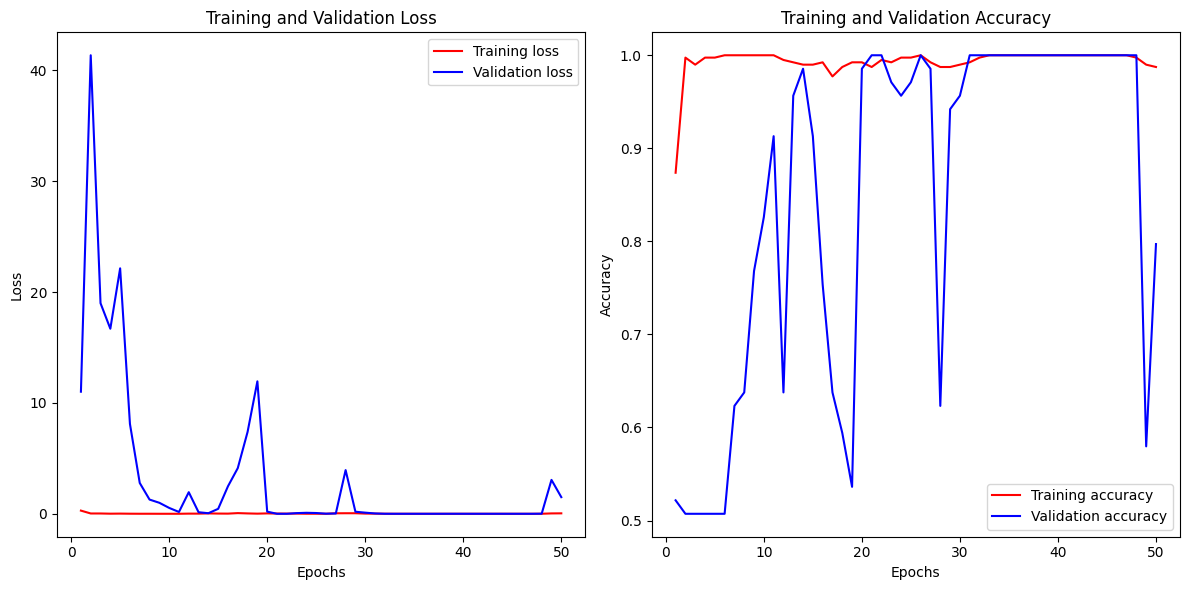

In [32]:
plot_history(history_augment3)

In [ ]:

model_augment3.save('/content/drive/MyDrive/model_augment3.h5')  # Save the model to a file
with open('/content/drive/MyDrive/training_history_augment3.pkl', 'wb') as file:
    pickle.dump(history_augment3.history, file)  # Save the history object to a file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = False)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = False)
test_ds = tf.keras.utils.image_dataset_from_directory(
directory =test_dir,
image_size = (150, 150),
seed = 42,
shuffle = False)


Found 465 files belonging to 2 classes.
Using 396 files for training.
Found 465 files belonging to 2 classes.
Using 69 files for validation.
Found 40 files belonging to 2 classes.


2/2 [==============================] - 0s 67ms/step
[[168  75]
 [  0 153]]

Classification Report for train:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82       243
           1       0.67      1.00      0.80       153

    accuracy                           0.81       396
   macro avg       0.84      0.85      0.81       396
weighted avg       0.87      0.81      0.81       396

Train's Specificity: 0.691358024691358

Classification Report for test:
              precision    recall  f1-score   support

           0       0.18      0.15      0.16        20
           1       0.26      0.30      0.28        20

    accuracy                           0.23        40
   macro avg       0.22      0.22      0.22        40
weighted avg       0.22      0.23      0.22        40

Test's Specificity: 0.15


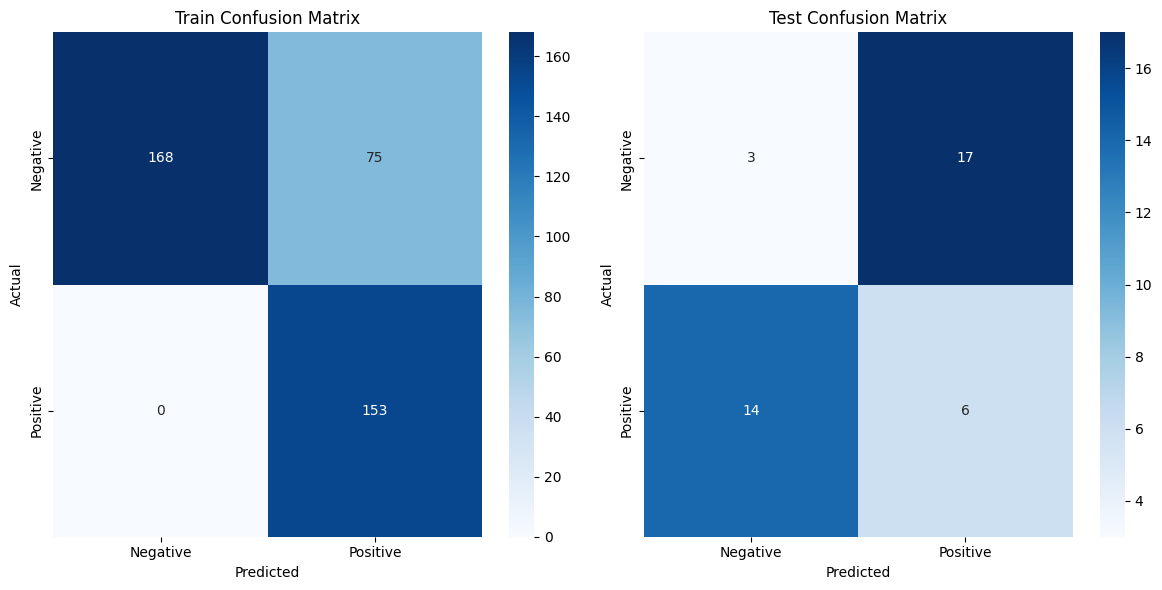

In [34]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model_augment3)
test_accs_augmented.append(test_acc)

# Forth augmentation

In [35]:
!rm -rf "/content/dataset1"

In [36]:
source_folder_normal = "/content/dataset/Dataset/xray_dataset_covid19/train/NORMAL"
source_folder_covid = "/content/dataset/Dataset/xray_dataset_covid19/train/COVID"
destination_folder = "/content/dataset1/train"
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 90)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 90)
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 180)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 180)
rotate(source_folder_covid, os.path.join(destination_folder, "COVID"), 270)
rotate(source_folder_normal, os.path.join(destination_folder, "NORMAL"), 270)
#Orignial data
copy_images(source_folder_normal, os.path.join(destination_folder, "NORMAL"))
copy_images(source_folder_covid, os.path.join(destination_folder, "COVID"))
# Fliping
flip_images(source_folder_normal, os.path.join(destination_folder, "NORMAL"))
flip_images(source_folder_covid, os.path.join(destination_folder, "COVID"))

Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/NORMAL to /content/dataset1/train/NORMAL
Images copied successfully from /content/dataset/Dataset/xray_dataset_covid19/train/COVID to /content/dataset1/train/COVID


In [37]:
test_dir="/content/dataset/Dataset/xray_dataset_covid19/test"
train_data_dir="/content/dataset1/train"

## Dataloader

In [48]:
train_ds,val_ds,test_ds=creat_datasets(train_data_dir,test_dir)

Found 613 files belonging to 2 classes.
Using 522 files for training.
Found 613 files belonging to 2 classes.
Using 91 files for validation.
Found 40 files belonging to 2 classes.


## train

In [39]:
history,model=creat_train_model(train_ds,val_ds,layer_number=6,epochs=50)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_21 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_15 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 75, 75, 128)      

## Evaluation

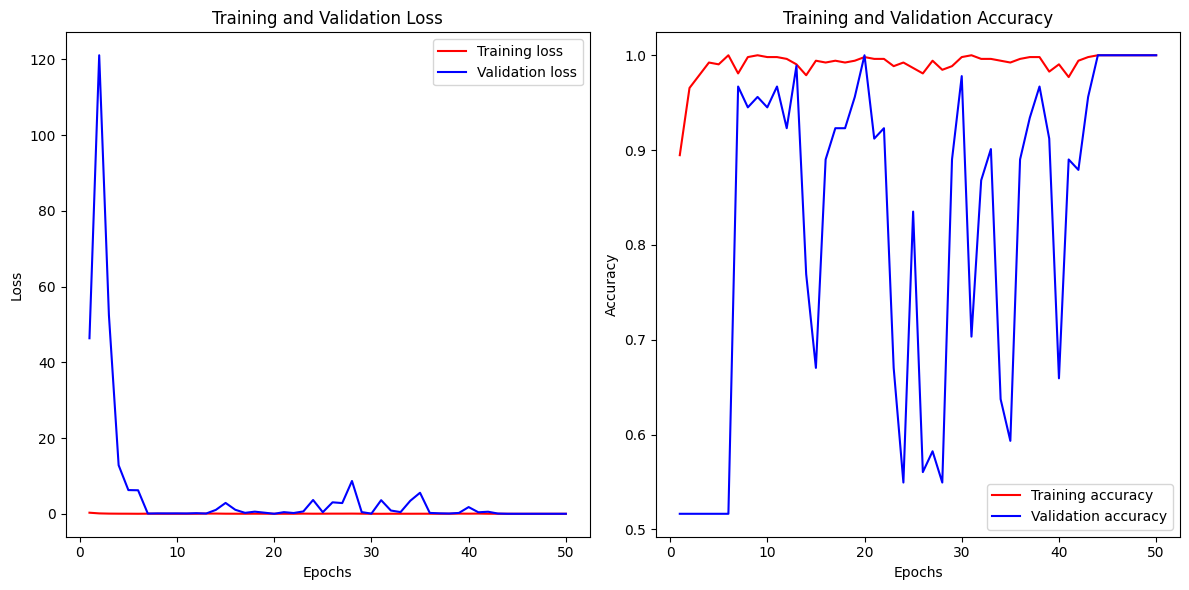

In [40]:
plot_history(history)

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "training",
seed = 42,
shuffle = False)

val_ds = tf.keras.utils.image_dataset_from_directory(
directory =train_data_dir,
image_size = (150, 150),
validation_split = 0.15,
subset = "validation",
seed = 42,
shuffle = False)
test_ds = tf.keras.utils.image_dataset_from_directory(
directory =test_dir,
image_size = (150, 150),
seed = 42,
shuffle = False)


Found 613 files belonging to 2 classes.
Using 522 files for training.
Found 613 files belonging to 2 classes.
Using 91 files for validation.
Found 40 files belonging to 2 classes.


In [43]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model)
test_accs_augmented.append(test_acc)

 3/17 [====>.........................] - ETA: 7s - loss: 8.9421e-04 - accuracy: 1.0000

KeyboardInterrupt: ignored

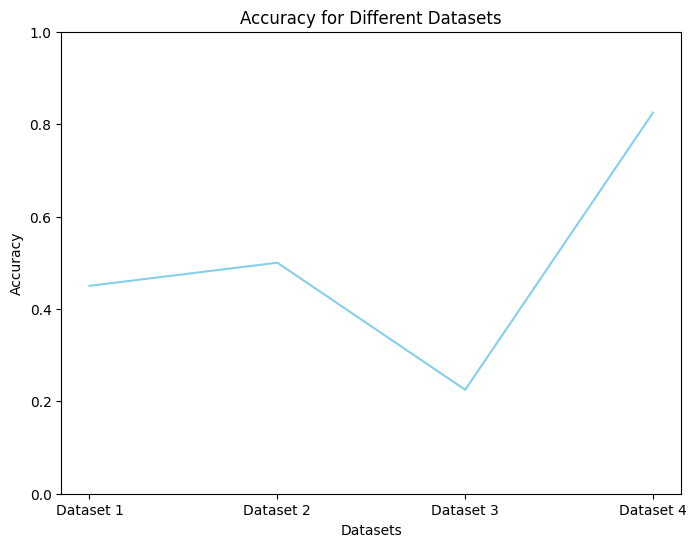

In [45]:
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(datasets, test_accs_augmented, color='skyblue')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Datasets')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy range
plt.show()

# Extera

## one Layer

In [49]:
accuracies=[]

In [50]:
history,model=creat_train_model(train_ds,val_ds,layer_number=1,epochs=50)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_31 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_21 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_21 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 flatten_5 (Flatten)         (None, 360000)           

## Evaluation

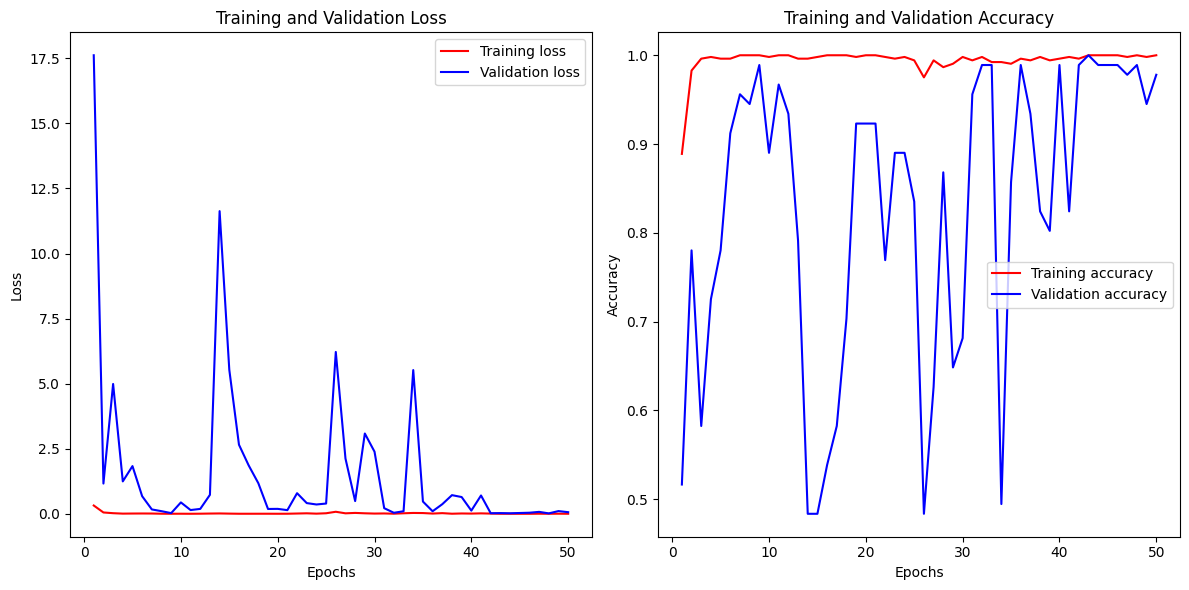

In [51]:
plot_history(history)

2/2 [==============================] - 0s 59ms/step
[[135 135]
 [121 131]]

Classification Report for train:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       270
           1       0.49      0.52      0.51       252

    accuracy                           0.51       522
   macro avg       0.51      0.51      0.51       522
weighted avg       0.51      0.51      0.51       522

Train's Specificity: 0.5

Classification Report for test:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

Test's Specificity: 0.95


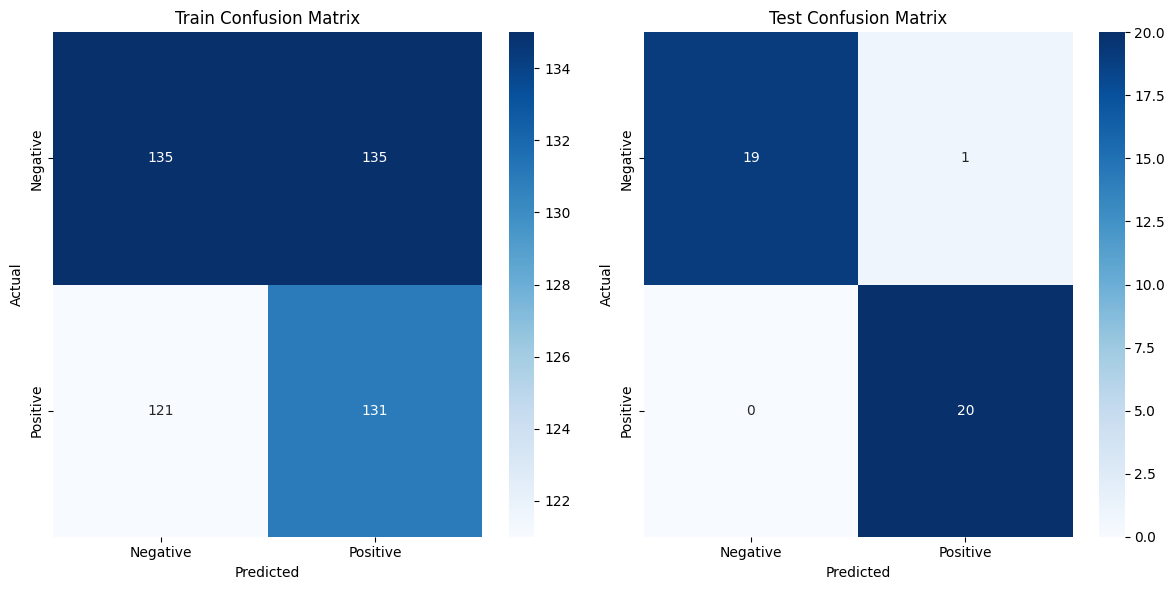

In [52]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model)
accuracies.append(test_acc)

## Two Layer

In [53]:
history,model=creat_train_model(train_ds,val_ds,layer_number=2,epochs=50)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_34 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_22 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_22 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 128)      

## Evaluation

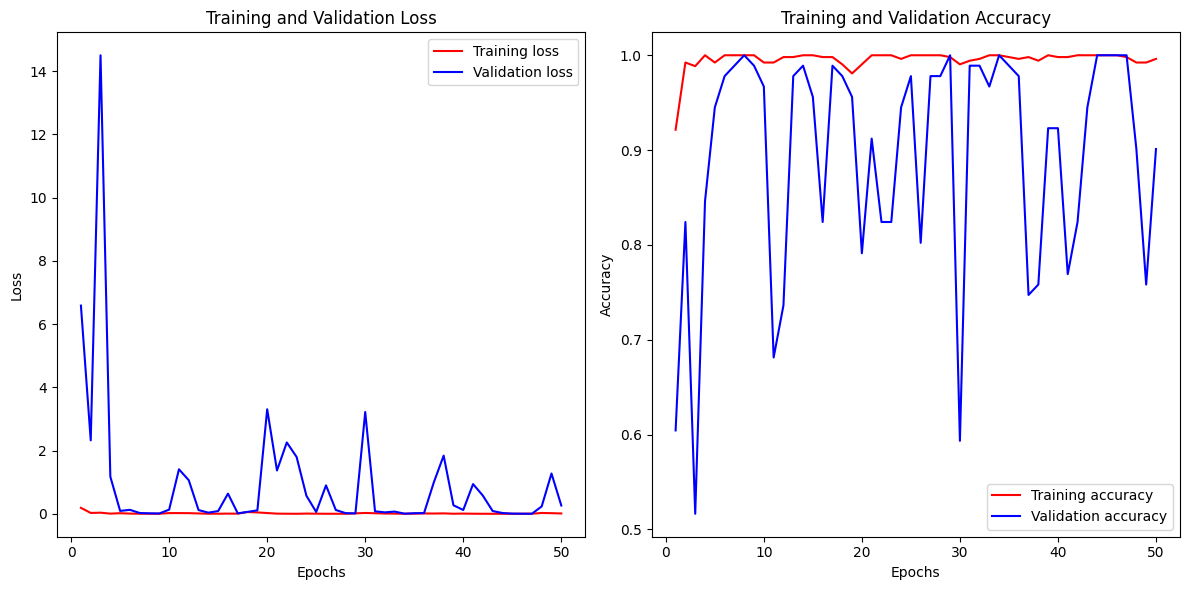

In [54]:
plot_history(history)

2/2 [==============================] - 0s 53ms/step
[[160 110]
 [151 101]]

Classification Report for train:
              precision    recall  f1-score   support

           0       0.51      0.59      0.55       270
           1       0.48      0.40      0.44       252

    accuracy                           0.50       522
   macro avg       0.50      0.50      0.49       522
weighted avg       0.50      0.50      0.50       522

Train's Specificity: 0.5925925925925926

Classification Report for test:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      0.60      0.75        20

    accuracy                           0.80        40
   macro avg       0.86      0.80      0.79        40
weighted avg       0.86      0.80      0.79        40

Test's Specificity: 1.0


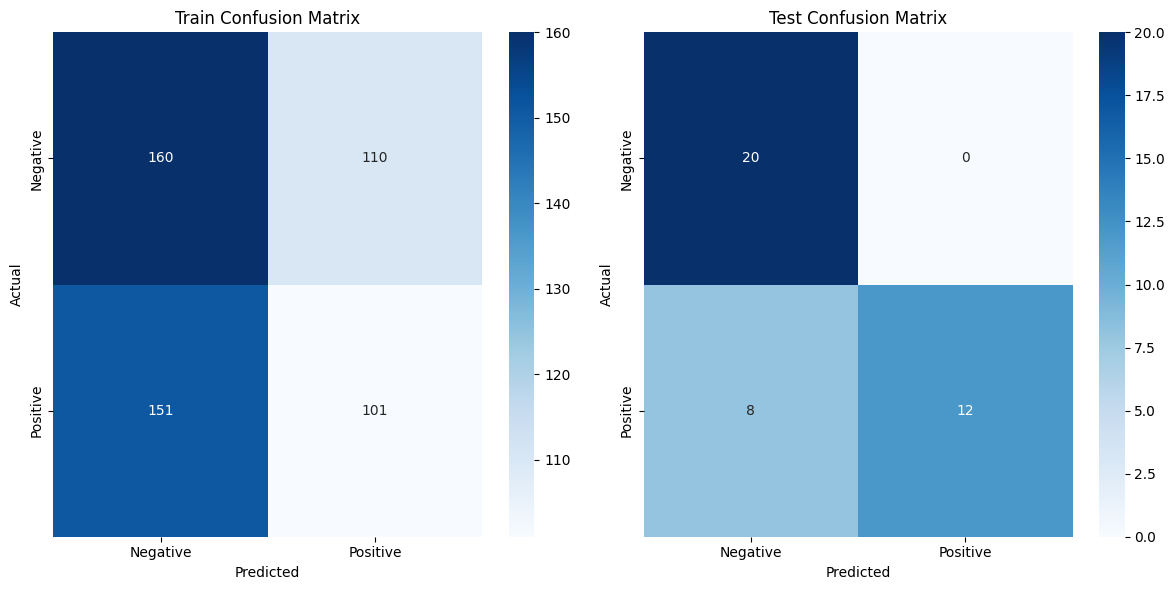

In [55]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model)
accuracies.append(test_acc)

## Three Layer

In [56]:
history,model=creat_train_model(train_ds,val_ds,layer_number=3,epochs=50)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_38 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_24 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 128)      

## Evaluation

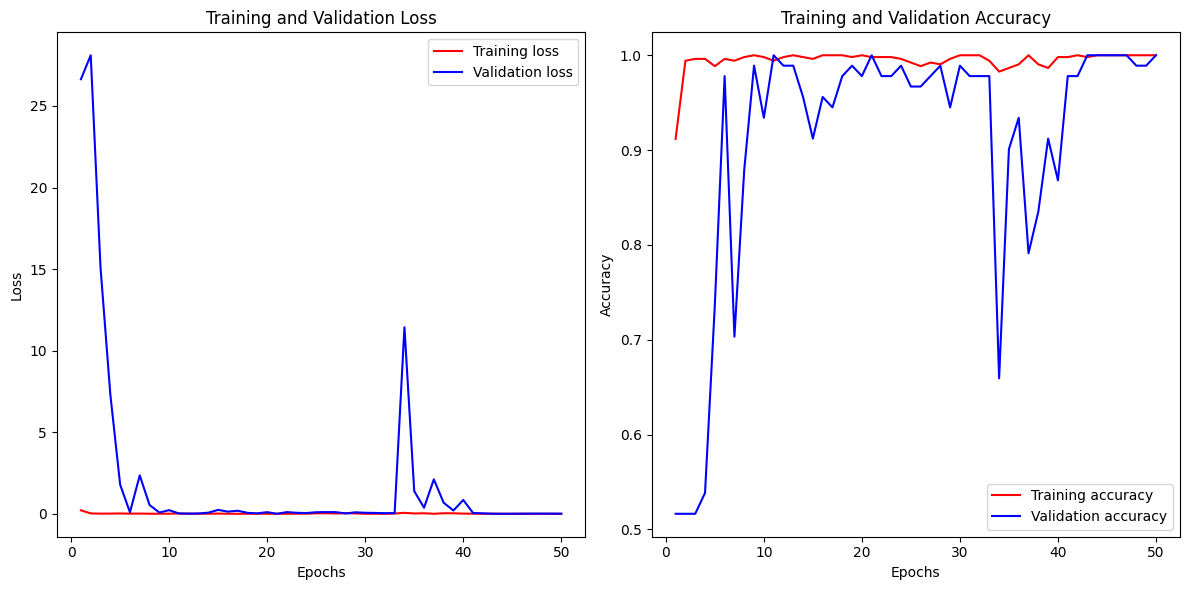

In [57]:
plot_history(history)

2/2 [==============================] - 1s 106ms/step
[[138 132]
 [132 120]]

Classification Report for train:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       270
           1       0.48      0.48      0.48       252

    accuracy                           0.49       522
   macro avg       0.49      0.49      0.49       522
weighted avg       0.49      0.49      0.49       522

Train's Specificity: 0.5111111111111111

Classification Report for test:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Test's Specificity: 1.0


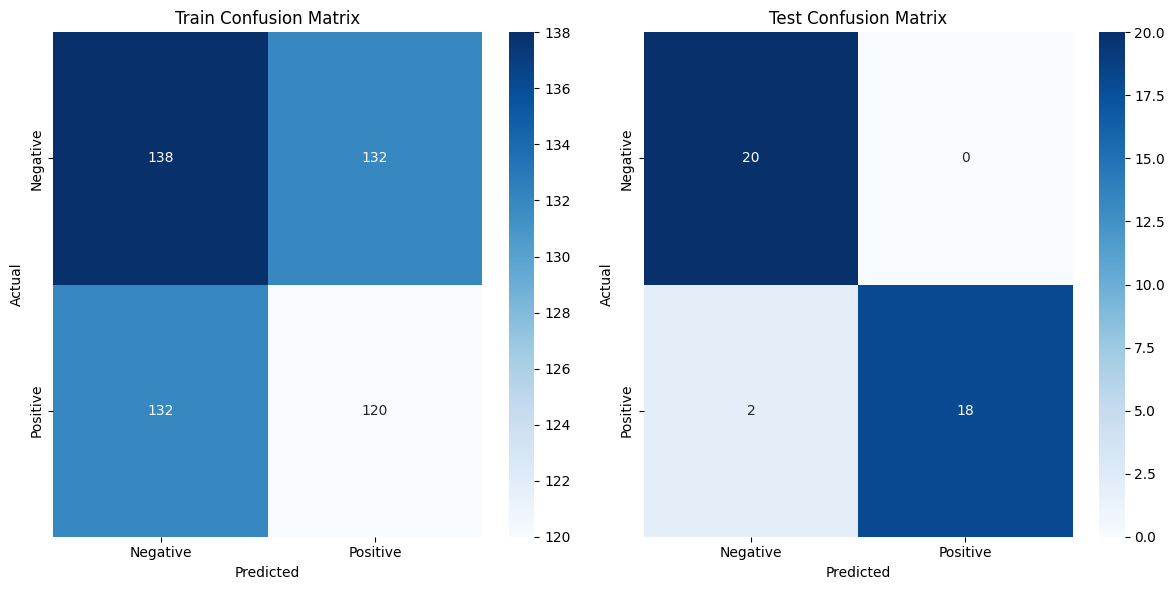

In [58]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model)
accuracies.append(test_acc)

## Four Layer

In [59]:
history,model=creat_train_model(train_ds,val_ds,layer_number=4,epochs=50)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_43 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_27 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_27 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 75, 75, 128)      

## Evaluation

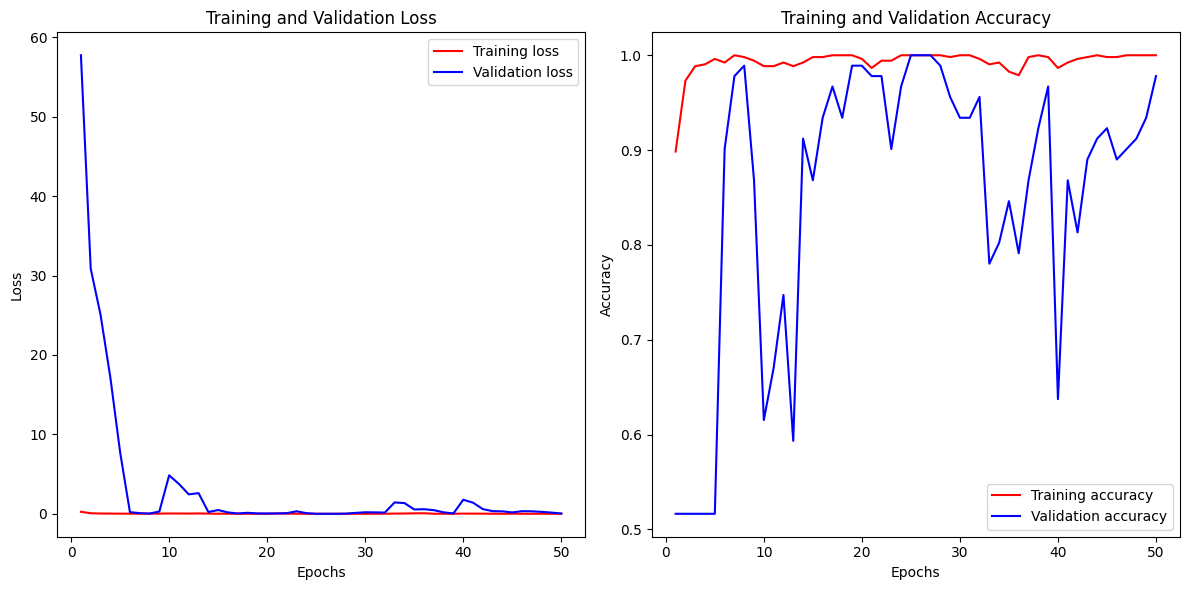

In [60]:
plot_history(history)

2/2 [==============================] - 0s 52ms/step
[[141 129]
 [128 124]]

Classification Report for train:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       270
           1       0.49      0.49      0.49       252

    accuracy                           0.51       522
   macro avg       0.51      0.51      0.51       522
weighted avg       0.51      0.51      0.51       522

Train's Specificity: 0.5222222222222223

Classification Report for test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Test's Specificity: 1.0


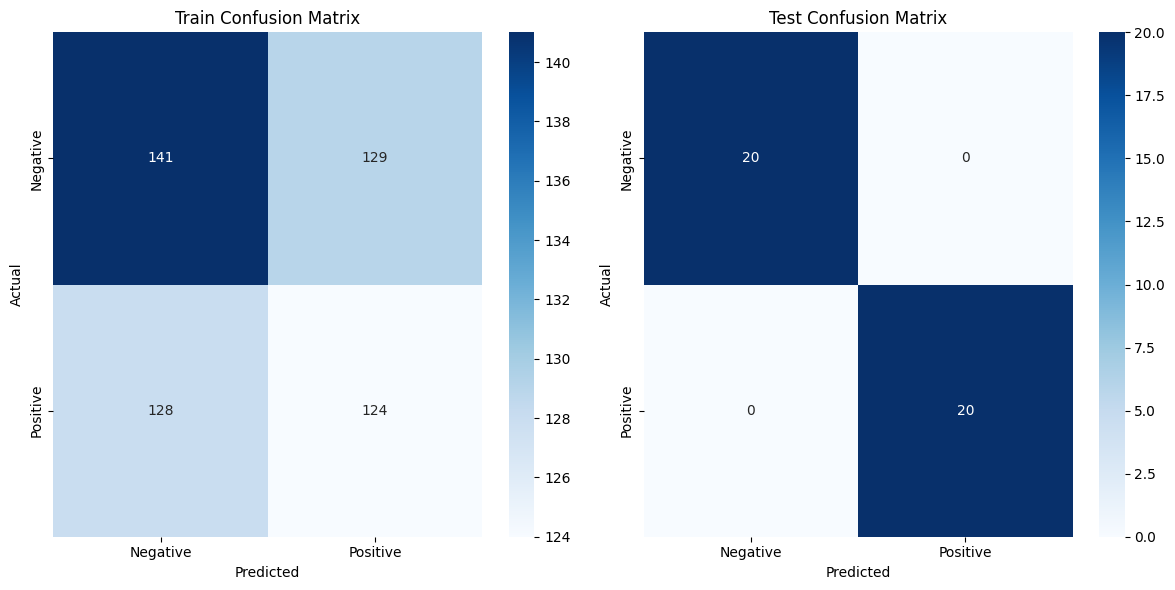

In [61]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model)
accuracies.append(test_acc)

## Five Layer

In [62]:
history,model=creat_train_model(train_ds,val_ds,layer_number=5,epochs=50)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_49 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_31 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 dropout_31 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 75, 75, 128)      

## Evaluation

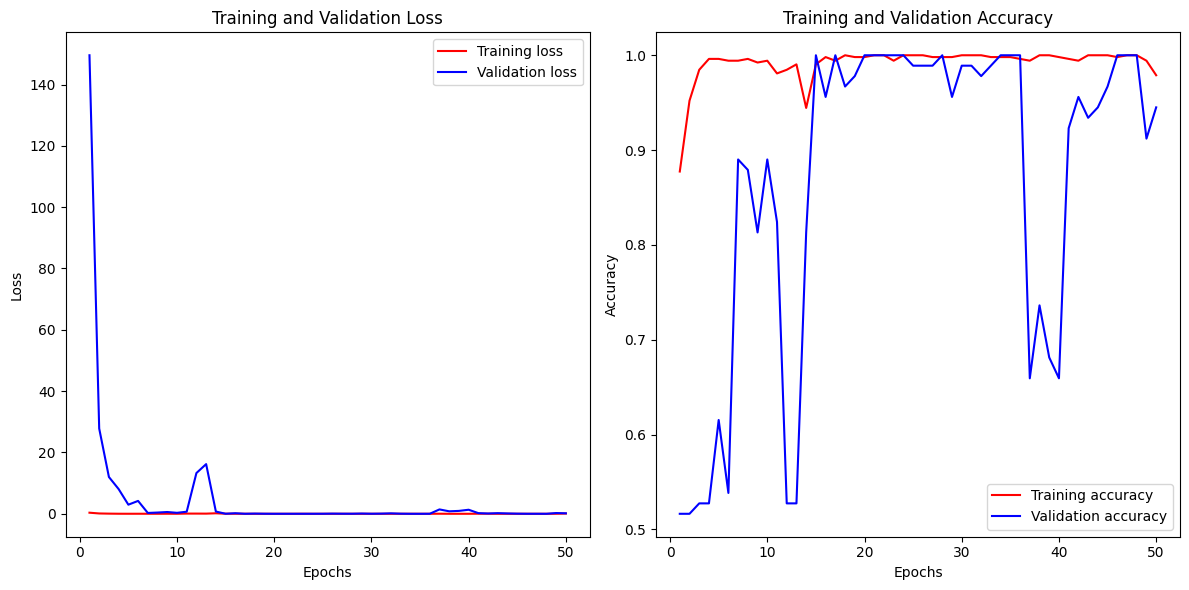

In [63]:
plot_history(history)

2/2 [==============================] - 0s 63ms/step
[[115 155]
 [108 144]]

Classification Report for train:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47       270
           1       0.48      0.57      0.52       252

    accuracy                           0.50       522
   macro avg       0.50      0.50      0.49       522
weighted avg       0.50      0.50      0.49       522

Train's Specificity: 0.42592592592592593

Classification Report for test:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.80      1.00      0.89        20

    accuracy                           0.88        40
   macro avg       0.90      0.88      0.87        40
weighted avg       0.90      0.88      0.87        40

Test's Specificity: 0.75


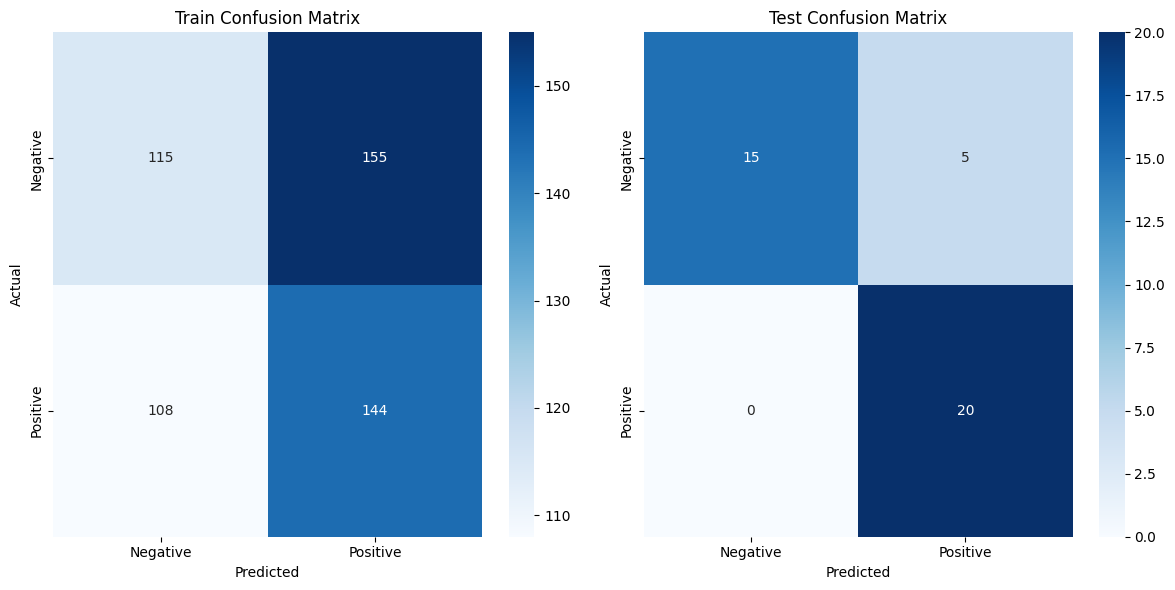

In [64]:
test_acc,test_loss,train_acc,train_loss=evaluate_model(train_ds,test_ds,model)
accuracies.append(test_acc)

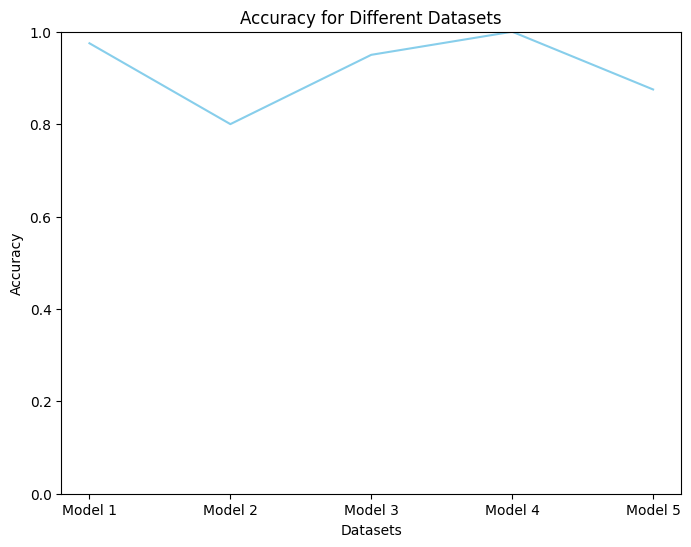

In [66]:
datasets = ['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5']

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(datasets, accuracies, color='skyblue')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Datasets')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy range
plt.show()